In [44]:
import pandas as pd
import numpy as np
from scipy import stats
import matplotlib.pyplot as plt

# Table of Contents

- [Documentation about the dataset](#documentation)
- [Data Exploration & Cleaning](#exploration)
- [Support at work](#support)
- [Openness at work](#openness)

In [3]:
mh = pd.read_csv("mental-health-tech-survey.csv")

<a id=’documentation’></a>
## Documentation about the dataset

- **Timestamp** - Time the survey was submitted

- **Age** - Respondent age

- **Gender** - Respondent gender

- **Country** - Respondent country

- **state** - If you live in the United States, which state or territory do you live in?

- **self_employed** - Are you self-employed?

- **family_history** - Do you have a family history of mental illness?

- **treatment** - Have you sought treatment for a mental health condition?

- **work_interfere** - If you have a mental health condition, do you feel that it interferes with your work?

- **no_employees** - How many employees does your company or organization have?

- **remote_work** - Do you work remotely (outside of an office) at least 50% of the time?

- **tech_company** - Is your employer primarily a tech company/organization?

- **benefits** - Does your employer provide mental health benefits?

- **care_options** - Do you know the options for mental health care your employer provides?

- **wellness_program** - Has your employer ever discussed mental health as part of an employee wellness program?

- **seek_help** - Does your employer provide resources to learn more about mental health issues and how to seek help?

- **anonymity** - Is your anonymity protected if you choose to take advantage of mental health or substance abuse treatment resources? 

- **leave** - How easy is it for you to take medical leave for a mental health condition?

- **mental_health_consequence** - Do you think that discussing a mental health issue with your employer would have negative consequences?

- **phys_health_consequence** - Do you think that discussing a physical health issue with your employer would have negative consequences?

- **coworkers** - Would you be willing to discuss a mental health issue with your coworkers?

- **supervisor** - Would you be willing to discuss a mental health issue with your direct supervisor(s)?

- **mental_health_interview** - Would you bring up a mental health issue with a potential employer in an interview?

- **phys_health_interview** - Would you bring up a physical health issue with a potential employer in an interview?

- **mental_vs_physical** - Do you feel that your employer takes mental health as seriously as physical health?

- **obs_consequence** - Have you heard of or observed negative consequences for coworkers with mental health conditions in your workplace?

- **comments** - Any additional notes or comments

In [2]:
mh.head(10)

,Timestamp,Age,Gender,Country,state,self_employed,family_history,treatment,work_interfere,no_employees,...,leave,mental_health_consequence,phys_health_consequence,coworkers,supervisor,mental_health_interview,phys_health_interview,mental_vs_physical,obs_consequence,comments
0,2014-08-27 11:29:31,37,Female,United States,IL,NaN,No,Yes,Often,6-25,...,Somewhat easy,No,No,Some of them,Yes,No,Maybe,Yes,No,NaN
1,2014-08-27 11:29:37,44,M,United States,IN,NaN,No,No,Rarely,More than 1000,...,Don't know,Maybe,No,No,No,No,No,Don't know,No,NaN
2,2014-08-27 11:29:44,32,Male,Canada,NaN,NaN,No,No,Rarely,6-25,...,Somewhat difficult,No,No,Yes,Yes,Yes,Yes,No,No,NaN
3,2014-08-27 11:29:46,31,Male,United Kingdom,NaN,NaN,Yes,Yes,Often,26-100,...,Somewhat difficult,Yes,Yes,Some of them,No,Maybe,Maybe,No,Yes,NaN
4,2014-08-27 11:30:22,31,Male,United States,TX,NaN,No,No,Never,100-500,...,Don't know,No,No,Some of them,Yes,Yes,Yes,Don't know,No,NaN
5,2014-08-27 11:31:22,33,Male,United States,TN,NaN,Yes,No,Sometimes,6-25,...,Don't know,No,No,Yes,Yes,No,Maybe,Don't know,No,NaN
6,2014-08-27 11:31:50,35,Female,United States,MI,NaN,Yes,Yes,Sometimes,1-5,...,Somewhat difficult,Maybe,Maybe,Some of them,No,No,No,Don't know,No,NaN
7,2014-08-27 11:32:05,39,M,Canada,NaN,NaN,No,No,Never,1-5,...,Don't know,No,No,No,No,No,No,No,No,NaN
8,2014-08-27 11:32:39,42,Female,United States,IL,NaN,Yes,Yes,Sometimes,100-500,...,Very difficult,Maybe,No,Yes,Yes,No,Maybe,No,No,NaN
9,2014-08-27 11:32:43,23,Male,Canada,NaN,NaN,No,No,Never,26-100,...,Don't know,No,No,Yes,Yes,Maybe,Maybe,Yes,No,NaN


<a id=’exploration’></a>

## Basic Data Exploration & Cleaning

In [4]:
mh.shape #checking how many rows & columns

(1259, 27)

In [5]:
mh.dtypes #checking data types

Timestamp                    object
Age                           int64
Gender                       object
Country                      object
state                        object
self_employed                object
family_history               object
treatment                    object
work_interfere               object
no_employees                 object
remote_work                  object
tech_company                 object
benefits                     object
care_options                 object
wellness_program             object
seek_help                    object
anonymity                    object
leave                        object
mental_health_consequence    object
phys_health_consequence      object
coworkers                    object
supervisor                   object
mental_health_interview      object
phys_health_interview        object
mental_vs_physical           object
obs_consequence              object
comments                     object
dtype: object

In [6]:
#checking unique values in each column

for col in mh.columns:
    print(col, mh[col].unique())

Timestamp ['2014-08-27 11:29:31' '2014-08-27 11:29:37' '2014-08-27 11:29:44' ...
 '2015-11-07 12:36:58' '2015-11-30 21:25:06' '2016-02-01 23:04:31']
Age [         37          44          32          31          33          35
          39          42          23          29          36          27
          46          41          34          30          40          38
          50          24          18          28          26          22
          19          25          45          21         -29          43
          56          60          54         329          55 99999999999
          48          20          57          58          47          62
          51          65          49       -1726           5          53
          61           8          11          -1          72]
Gender ['Female' 'M' 'Male' 'male' 'female' 'm' 'Male-ish' 'maile' 'Trans-female'
 'Cis Female' 'F' 'something kinda male?' 'Cis Male' 'Woman' 'f' 'Mal'
 'Male (CIS)' 'queer/she/they' 'non-binary' 'Fem

In [20]:
#converting Timestamp to datetime
mh['Timestamp'] = pd.to_datetime(mh['Timestamp'])

In [7]:
#replacing columns with yes/no values with bool

mh.replace({'family_history': {'Yes': True, 'No': False}, 'treatment': {'Yes': True, 'No': False}, 'remote_work': {'Yes': True, 'No': False}, 'tech_company': {'Yes': True, 'No': False}}, inplace = True)
mh.dtypes

Timestamp                    object
Age                           int64
Gender                       object
Country                      object
state                        object
self_employed                object
family_history                 bool
treatment                      bool
work_interfere               object
no_employees                 object
remote_work                    bool
tech_company                   bool
benefits                     object
care_options                 object
wellness_program             object
seek_help                    object
anonymity                    object
leave                        object
mental_health_consequence    object
phys_health_consequence      object
coworkers                    object
supervisor                   object
mental_health_interview      object
phys_health_interview        object
mental_vs_physical           object
obs_consequence              object
comments                     object
dtype: object

In [29]:
#Making care options consistent with other support categories
mh.loc[:,"care_options"].replace({'Not sure': "Don't know"}, inplace=True)

<a id=’support’></a>
## Support

Looked into the different types of support for mental health at work.

**Dimensions:** types of support, ease of leave.

**Summary:** 

- The majority of employers provides mental health benefits, but only by a small margin. A significant portion of participants do not know if their employer provides mental health benefits.

- The majority of the employees do not know the options for mental health care provided by their employer.

- Most employers have not discussed mental health as part of an employee wellness program.

- Most employers do not provide resources to learn more about mental health issues to seek help.

- Most employees do not know if their anonymity protected if they choose to take advantage of mental health  treatment resources.

- Most employees do not know about how easy it is for them to get a leave of absence for mental health conditions.


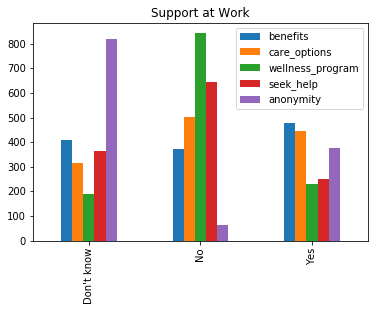

In [41]:
work_conditions = mh[["benefits", "care_options", "wellness_program", "seek_help", "anonymity"]]

work_conditions.apply(pd.value_counts).plot(kind='bar', title='Support at Work')
plt.show()

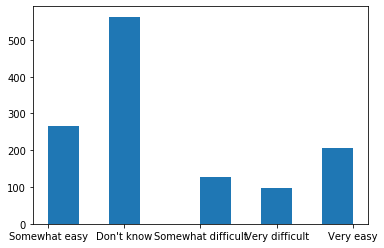

In [43]:
leave = mh["leave"]

plt.hist(leave)
plt.show()


<a id=’openness’></a>
## Openness

Looked into the ease of discussing mental heatlh issues at work.

**Dimensions:** openness about mental health issues vs. physical issues; openness with colleagues.

**Summary:** 

- Most of the participants (73.5%) think that sharing physical health issues at work will not have negative consequences. However, only 38.9% think the same about sharing mental health issues at work.

- 40% of the participants admit they would share mental health issues with their supervisors, but only 17,9% would share the same issues with their coworkers.



### Openness regarding mental health issues vs. physical health issues

In [16]:
ment_heal = mh.mental_health_consequence.value_counts(sort=False, normalize=True)
phys_heal = mh.phys_health_consequence.value_counts(sort=False, normalize=True)
print(ment_heal)
print(phys_heal)

No       0.389198
Yes      0.231930
Maybe    0.378872
Name: mental_health_consequence, dtype: float64
No       0.734710
Yes      0.048451
Maybe    0.216839
Name: phys_health_consequence, dtype: float64


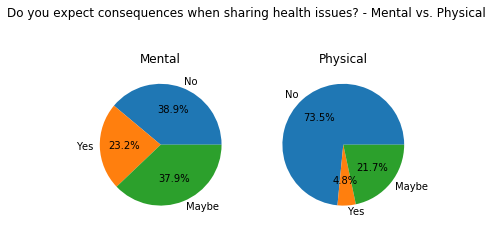

In [17]:
fig, (ax1, ax2) = plt.subplots(1, 2)
fig.suptitle('Do you expect consequences when sharing health issues? - Mental vs. Physical')

ax1.pie(ment_heal, labels = ["No", "Yes", "Maybe"], autopct='%1.1f%%')
ax1.title.set_text('Mental')

ax2.pie(phys_heal, labels = ["No", "Yes", "Maybe"], autopct='%1.1f%%')
ax2.title.set_text('Physical')

plt.show()

### Openness with colleagues

In [14]:
coworkers = mh.coworkers.value_counts(sort=False,normalize=True)
supervisors = mh.supervisor.value_counts(sort=False,normalize=True)
print(coworkers)
print(supervisors)

No              0.206513
Some of them    0.614774
Yes             0.178713
Name: coworkers, dtype: float64
No              0.312153
Some of them    0.277998
Yes             0.409849
Name: supervisor, dtype: float64


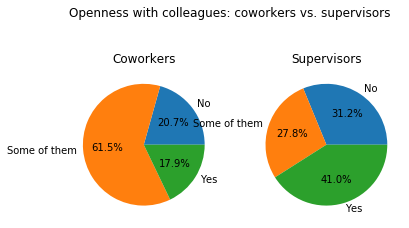

In [15]:
fig, (ax1, ax2) = plt.subplots(1,2)
fig.suptitle('Openness with colleagues: coworkers vs. supervisors')

ax1.pie(coworkers, labels = ["No",'Some of them', 'Yes'], autopct='%1.1f%%')
ax1.title.set_text('Coworkers')

ax2.pie(supervisors, labels = ["No",'Some of them', 'Yes'], autopct='%1.1f%%')
ax2.title.set_text('Supervisors')

plt.show()